# Numerical Simulation Laboratory

## Numerical exercise 3 
La cartella contiene i vari files organizzati nelle seguenti cartelle:
- <font color='red'>**Code**</font>: contiene il codice dei tre esercizi: ogni file è compilabile attraverso il comando *make nome_file.exe*.
- **<font color='red'>Files</font>**: contiene i files di output contenenti i dati necessari per costruire i grafici.
- **<font color='red'>Pictures</font>**: contiene eventuali immagini riportate nel notebook.

Il codice è stato organizzato nel seguente modo:
- <font color='red'>*exercise_1.cpp*</font> codice relativo all'esercizio 03.1: simulazione delle *European option*.
- <font color='red'>*random.cpp*</font> contiene il codice necessario per la generazione di numeri casuali.
- <font color='red'>*statistics.cpp*</font> contiene la definizione di alcune funzioni utilizzate negli esercizi per le stime dei valori medi e delle incertezze statistiche.

### Exercise 03.1

Stima delle *European option* attraverso una simulazione Monte Carlo del prezzo $S(T)$ degli asset considerati, necessario per determinare il profitto dei due tipi di opzioni possibili, *call-option* e *put-option*.
In particolare, stimando $M$ volte il valore del prezzo $S(T)$ delle attività considerate posso ricavare il valore medio del profitto per entrambe le opzioni:

- **Call-option** $ \quad C\left[ S(t),t \right] = \langle e^{(-rT)}max(0, S(T)-K) \rangle $
- **Put-option**$ \quad P\left[ S(t),t \right] = \langle e^{(-rT)}max(0, K-S(T)) \rangle \$

dove le parentesi angolari indicano che la quantità è mediata sugli $M$ valori stimati del prezzo $S(T)$ e $K$ indica il *prezzo di mercato* al tempo $T$ dei medesimi asset. Posso inoltre ripetere il procedimento fino a ottenere la stima di $N$ valori medi per il profitto di entrambe le opzioni: così facendo posso calcolare le medie progressive e le relative incertezze statistiche. In particolare se indico con $G_i$ il valore medio del profitto per *call* e *put* option, relativo all'$i$-esimo blocco di simulazioni, posso ricavare le <font color='red'>**medie progressive**</font> al variare degl numero di blocchi considerati come
        $$ \langle G^2 \rangle_N = \frac{1}{N} \sum_{i=1}^N G^2_i \quad \quad \langle G\rangle_N^2 = \left( \frac{1}{N} \sum_{i=1}^N G_i \right)^2 \,,$$
e le relatve incertezze statistiche come <font color='red'>**deviazioni standard della media**</font>:
    $$ \frac{\sigma_N}{\sqrt{N-1}} = \sqrt{\frac{1}{N-1} \left( \langle G^2 \rangle_N - \langle G\rangle_N^2  \right)}\,.$$

Per effettuare la simulazione stimo $S\sim GBM(\mu,\sigma^2)$ come un moto Browniano geometrico e simulo il prezzo finale egli asset attraverso i seguenti metodi.

1. <font color='blue'>**Simulazione diretta**</font> del prezzo finale $S(T)$ attraverso un moto Browniano geometrico di *interesse privo di rischio* $r$ e *volatilità* $\sigma$. Per simulare un dato prezzo  $S\sim GBM(\mu,\sigma^2)$ con valore iniziale $S(0)$, utilizzo l'equazione seguente:
     $$S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right] \,,$$
dove $W(t)\sim\mathcal{N}(0,t)$ è un numero casuale distribuito normalmente intorno al valore $0$ e con deviazione standard $t$.

Il grafico sottostante mostra il profitto ottenuto per le due opzioni simulando direttamente il prezzo finale $S(T)$ e stimando medie e incertezze progressive sui vari blocchi. In particolare la simulazione è stata effettuata per $N=100$ blocchi costituiti da $M=10^4$ stime del profitto delle opzioni per ciascun blocco.

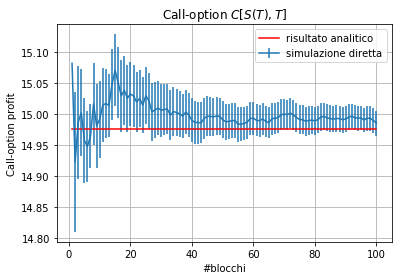

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

#risultati analitici 
call = 14.9758
put = 5.4595

#importo i dati ottenuti per entrambe le simulazioni Monte Carlo 
n, C, Cerr, P, Perr= np.loadtxt('./Files/exe1_direct.out', delimiter = '  ', unpack = 'True')

plt.xlabel('#blocchi')
plt.ylabel('Call-option profit')

y = call*n**0
plt.plot(n, y, color='red', label='risultato analitico')  #grafico risultato analitico
plt.errorbar(n, C, yerr=Cerr, label='simulazione diretta') #grafico simulazione

plt.title("Call-option $C[S(T),T]$")
plt.legend()
plt.grid(True)

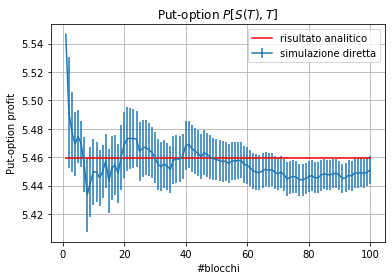

In [10]:
plt.xlabel('#blocchi')
plt.ylabel('Put-option profit')

y = put*n**0
plt.plot(n, y, color='red', label='risultato analitico') #grafico risultato analitico
plt.errorbar(n, P, yerr=Perr, label='simulazione diretta') #grafico simulazione

plt.title("Put-option $P[S(T),T]$")
plt.legend()
plt.grid(True)

2. <font color='blue'>**Simulazione discretizzata**</font> del prezzo finale $S(T)$ suddividendo l'intervallo temporale $[0,T]$ in $10^2$ sottointervalli e stimando il prezzo in modo iterativo. In particolare se indico ciascun istante come $t_i$ per $i=1,2,..,100$ dove $t_100 = T \,,$ posso determinare il prezzo degli asset come:
    $$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z\sqrt{t_{i+1}-t_i}\right] \,,$$
dove $Z \sim \mathcal{N}(0,1)$ è un numero casuale con distribuzione di probabilità normale standardizzata.

Il grafico sottostante mostra il profitto ottenuto per le due opzioni simulando in modo discretizzato il prezzo finale $S(T)$ e stimando medie e incertezze progressive sui vari blocchi. In particolare la simulazione è stata effettuata per $N=100$ blocchi costituiti da $M=10^4$ stime del profitto delle opzioni per ciascun blocco.

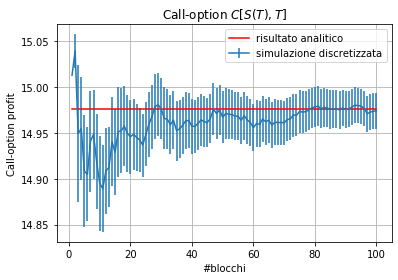

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

#risultati analitici 
call = 14.9758
put = 5.4595

#importo i dati ottenuti per entrambe le simulazioni Monte Carlo 
n, C, Cerr, P, Perr= np.loadtxt('./Files/exe1_discretiz.out', delimiter = '  ', unpack = 'True')

plt.xlabel('#blocchi')
plt.ylabel('Call-option profit')

y = call*n**0
plt.plot(n, y, color='red', label='risultato analitico') #grafico risultato analitico
plt.errorbar(n, C, yerr=Cerr, label='simulazione discretizzata') #grafico simulazione

plt.title('Call-option $C[S(T),T]$')
plt.legend()
plt.grid(True)

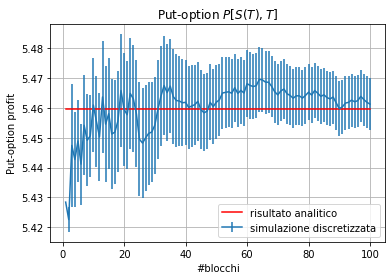

In [12]:
plt.xlabel('#blocchi')
plt.ylabel('Put-option profit')

y = put*n**0
plt.plot(n, y, color='red', label='risultato analitico') #grafico risultato analitico
plt.errorbar(n, P, yerr=Perr, label='simulazione discretizzata') #grafico simulazione

plt.title('Put-option $P[S(T),T]$')
plt.legend(loc=4)
plt.grid(True)

In entrambe le simulazioni, diretta e discretizzata, ho utilizzato i seguenti valori per i parametri riportati nelle equazioni:

- prezzo degli asset a $t=0$: $S(0)=100$
- istante di tempo finale: $T=1$
- prezzo di mercato: $K=100$
- interesse privo di rischio: $r=0.1$
- volatilità: $\sigma=0.25$